In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-on-students-performance-in-subjects/StudentsPerformance.csv


In [2]:
df=pd.read_csv("/kaggle/input/eda-on-students-performance-in-subjects/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
numeric_cols = ['math score', 'reading score', 'writing score']

# Remove outliers
df_clean = remove_outliers_iqr(df, numeric_cols)

print("Cleaned DataFrame:")
df_clean

Cleaned DataFrame:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)
q1, q3

(57.0, 77.0)

In [15]:
IQR=q3-q1
IQR

20.0

In [17]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
lower_bound, upper_bound

(27.0, 107.0)

In [19]:
df[(df['math score']<lower_bound)|(df['math score']>upper_bound)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [23]:
df[(df['math score']>lower_bound)&(df['math score']<upper_bound)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
df['zscore']=(df['math score']-df['math score'].mean())/df['math score'].std()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,zscore
0,female,group B,bachelor's degree,standard,none,72,72,74,0.389828
1,female,group C,some college,standard,completed,69,90,88,0.191979
2,female,group B,master's degree,standard,none,90,95,93,1.576922
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.258913
4,male,group C,some college,standard,none,76,78,75,0.653627
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.445023
996,male,group C,high school,free/reduced,none,62,55,55,-0.269668
997,female,group C,high school,free/reduced,completed,59,71,65,-0.467517
998,female,group D,some college,standard,completed,68,78,77,0.126030


<Axes: xlabel='math score'>

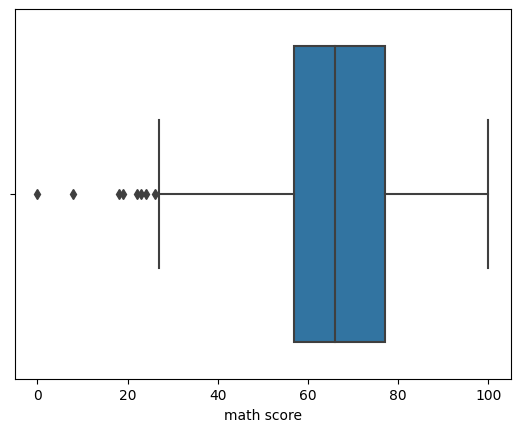

In [28]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x=df['math score'])

<Axes: ylabel='math score'>

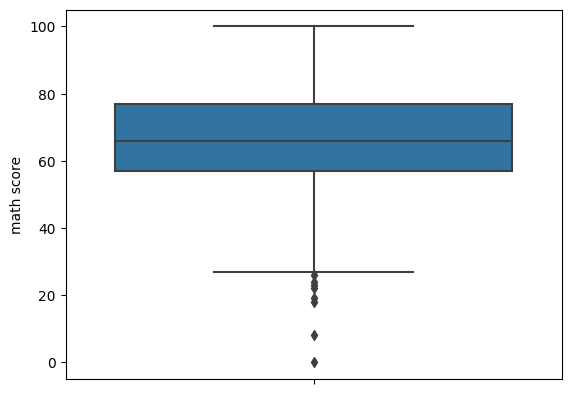

In [31]:
sns.boxplot(y=df['math score'])

In [42]:
from scipy.stats import skew

# Check skewness of all three score columns
print("Original Skewness:")
print("Math Score:", skew(df['math score']))
print("Reading Score:", skew(df['reading score']))
print("Writing Score:", skew(df['writing score']))

Original Skewness:
Math Score: -0.278516571914075
Reading Score: -0.2587156992782934
Writing Score: -0.28900962452114176


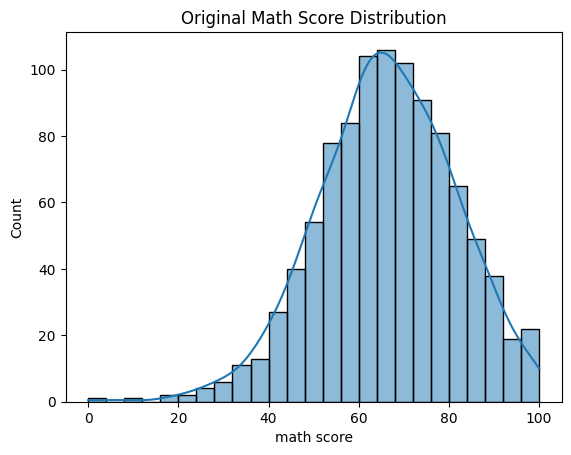

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE for math score
sns.histplot(df['math score'], kde=True)
plt.title("Original Math Score Distribution")
plt.show()

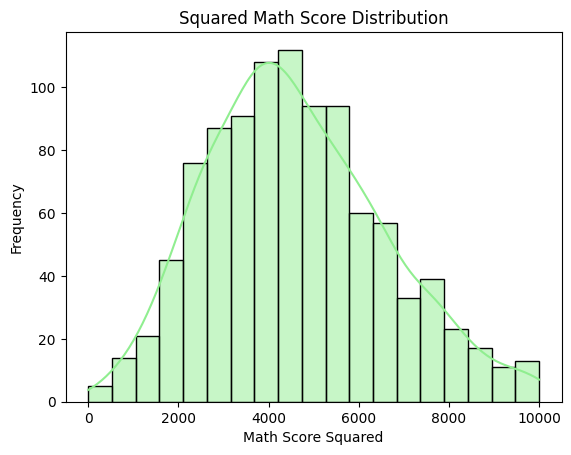

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Square transform to reduce left skewness
df['math_squared'] = df['math score'] ** 2

# Step 2: Plot the transformed distribution
sns.histplot(df['math_squared'], kde=True, color='lightgreen')
plt.title("Squared Math Score Distribution")
plt.xlabel("Math Score Squared")
plt.ylabel("Frequency")
plt.show()